<a href="https://colab.research.google.com/github/himalayahall/cuny-bridge-math/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def evenodd(num : int) -> None :
  '''
    Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine
    Prints whether number is even-odd, then prints next 9 number of the same type.
    For example, if input is 1, the output will be:
      1 is odd
      1, 3, 5, 7, 9, 11, 13, 15, 17, 19
    if input is 2, the output will be:
      2 is even
      2, 4, 6, 8, 10, 12, 14, 16, 18, 20   
    Params:
      num : whole number
    Exceptions:
      Raises exception if input is non-numeric or is not a whole number (has significant digits to right of decimal)
  '''
  if (isinstance(num, int) == False):
    if (isinstance(num, float) == False or num.is_integer() == False):
      raise Exception("Invalid argument (must be integer): {}".format(num))

  if (num % 2 == 0):
    print ("{0} is even".format(num))
  else:
    print ("{0} is odd".format(num))

  for i in range(0, 10):
    print(num + i * 2)
  

In [2]:
# Test evenodd
evenodd(2)
evenodd(1)

2 is even
2
4
6
8
10
12
14
16
18
20
1 is odd
1
3
5
7
9
11
13
15
17
19


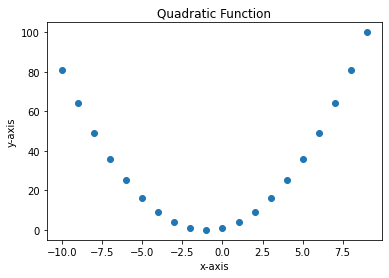

In [3]:
'''
Exploring a Quadratic Function Visually
'''

import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional

def draw_plot(x :  List[float], y : List[float], title : str = "Quadratic Function", x_label : str = "x-axis", y_label : str = "y-axis", marker : str = 'o') -> None:
  '''
  Draws plot.
  Params:
    x : x values
    y : y values
  '''    
  plt.plot(x, y, marker)
  plt.xlabel('x-axis')

  plt.ylabel('y-axis')
  plt.title(title)

def quad(x : float, a : float, b : float, c : float) -> float:
  '''
  Chapter 2.  Programming Challenge 2 page 55, Exploring a Quadratic Function Visually
  Quadratic function: a(x*x)+(b*x)+c
  Params:
    x : x value
    a : a value, cannot be 0.
    b : b value
    c : constant value
  Returns: a*sqr(x)+b*x+c
  '''
  if (a == 0):
    raise Exception("Invalid argument (a cannot be 0)")
  return (a * (x ** 2)) + (b * x) + c

# Test quadratic function
x = [item for item in range(-10, 10)]
y = [quad(item, 1, 2, 1) for item in x]
draw_plot(x, y)
#print(x)
#print(y)

In [4]:
'''
Statistics Calculator
'''
import csv
from collections import Counter
def read_csv(filename : str) -> List[float]:
  with open(filename) as f:
    reader = csv.reader(f)

    'Skip header row'
    next(reader)
    data = []
    for row in reader:
      data.append(float(row[0]))
  return data

def calc_mean(numbers: List[float]) -> float:
  return sum(numbers) / len(numbers)

def calc_median(numbers: List[float]) -> float:
  numbers.sort()

  mids = []
  N = len(numbers)
  if (N % 2 == 1):
      mid_index = int((N + 1) / 2) - 1
      mids.append(numbers[mid_index])
  else:
      mid_index = int(N / 2) - 1
      mids.append(numbers[mid_index])
      mids.append(numbers[mid_index + 1] )
  
  return sum(mids) / len(mids)

def calc_mode(numbers: List[float]) -> float:
  counter = Counter(numbers)
  mode = counter.most_common(1)
  return mode[0][0]

def find_range(numbers: List[float]) -> List[float]:
  low = min(numbers)
  high = max(numbers)
  return low, high, high - low

def find_differences_from_mean(numbers: List[float]) -> List[float]:
  mean = calc_mean(numbers)
  diffs = [item - mean for item in numbers]
  return diffs

def calc_variance(numbers: List[float]) -> float:
  diffs = find_differences_from_mean(numbers)
  squared = [item ** 2 for item in diffs]
  return sum(squared) / len(numbers)

def stats_calculator() -> None:
  filename = input("Please enter CSV file name: ")
  numbers = read_csv(filename)
  
  mean = sum(numbers) / len(numbers)
  mode = calc_median(numbers)
  range = find_range(numbers)
  var = calc_variance(numbers)
  std = var ** 0.5


even_count_numbers = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
print("Mean: {0}, Median: {1}, Mode: {2}, Range: {3}".format(calc_mean(even_count_numbers), calc_median(even_count_numbers), calc_mode(even_count_numbers), find_range(even_count_numbers)))

odd_count_numbers = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200, 800]
print("Mean: {0}, Median: {1}, Mode: {2}".format(calc_mean(odd_count_numbers), calc_median(odd_count_numbers),calc_mode(odd_count_numbers)))

mode_numbers = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
print("Mean: {0}, Median: {1}, Mode: {2}, Variance: {3}".format(calc_mean(mode_numbers), calc_median(mode_numbers),calc_mode(mode_numbers), calc_variance(mode_numbers)))



Mean: 477.75, Median: 500.0, Mode: 100, Range: (60, 1200, 1140)
Mean: 502.53846153846155, Median: 500.0, Mode: 100
Mean: 477.75, Median: 500.0, Mode: 100, Variance: 141047.35416666666


In [5]:
from sympy import Symbol
from sympy import factor
x = Symbol('x')
y = Symbol('y')

p = x**3 + 3*x**2*y + 3*x*y**2 + y**3
facts = factor(p)
print(facts)
facts.expand()

(x + y)**3


x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [6]:
from sympy import Symbol, pprint, init_printing
def print_series(n: int, x_value: float) -> None:
  init_printing(order='rev-lex')
  x = Symbol('x')
  series = x
  for i in range(2, n + 1):
    series = series + (x**i) / i
  pprint(series)
  series_value = series.subs({x:x_value})
  print('Value of the series at {0}: {1}'.format(x_value, series_value))

print_series(10, 2)

     2    3    4    5    6    7    8    9    10
    x    x    x    x    x    x    x    x    x  
x + ── + ── + ── + ── + ── + ── + ── + ── + ───
    2    3    4    5    6    7    8    9     10
Value of the series at 2: 74752/315


In [7]:
'''
from sympy import solve
x = Symbol('x')
expr = x - 5 - 7
solve(expr)

expr = x**2 + 5*x + 4
solve(expr, dict=True)
'''

"\nfrom sympy import solve\nx = Symbol('x')\nexpr = x - 5 - 7\nsolve(expr)\n\nexpr = x**2 + 5*x + 4\nsolve(expr, dict=True)\n"

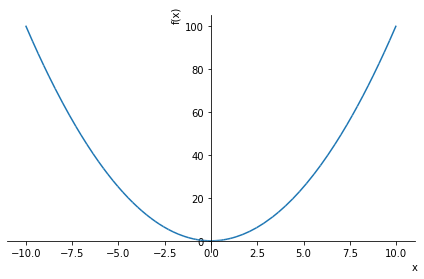

In [8]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(x**2)

In [9]:
from sympy import Poly, Symbol, solve_poly_inequality, sympify

def solve_single_var_inequality(var_symbol: str, ineq : str):
  '''
  Solving Single-Variable Inequalities.
  Params:
    var_symbol: variable symbol in inequality
    ineq: inequality expression
  '''
  
  ineq_expr = sympify(ineq)

  lhs = ineq_expr.lhs
  if (lhs.is_polynomial() == False):
    raise Exception('lhs is not a polynomial: {0}'.format(lhs))

  symbol = Symbol(var_symbol)
  poly = Poly(lhs, symbol)
  rel = ineq_expr.rel_op
  return solve_poly_inequality(poly, rel)

solve_single_var_inequality('x', '-x**2 + 4 < 0')
#

In [10]:
from random import seed
from random import randint

def calc_expected_value(trials: int) -> float:
    sum_of_rolls = sum(randint(1, 6) for i in range(0, trials))
    return sum_of_rolls / trials

trials = [100, 1000, 10000, 100000, 500000, 750000, 1000000]
expected_vals = {t : calc_expected_value(t) for t in trials}
print('Expected value: 3.5')
for v in trials:
  print('Trials: {0} : Trial average: {1}'.format(v, expected_vals[v]))

Expected value: 3.5
Trials: 100 : Trial average: 3.6
Trials: 1000 : Trial average: 3.481
Trials: 10000 : Trial average: 3.4966
Trials: 100000 : Trial average: 3.50143
Trials: 500000 : Trial average: 3.501146
Trials: 750000 : Trial average: 3.5015
Trials: 1000000 : Trial average: 3.498526


In [169]:
def gradient_descent_single_variable_with_lambda(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
  '''
    Gradient descent for single-variable expressions using lambdas. Very flexible implementation but requires client to
    provide the gradient function.
    Inputs:
      gradient : lambda expression
      start : starting value of x
      learn_rate : learning rate
      n_iter : number of iterations
      tolerance : tolerance
    Example:
      func = 'x**4-5*x**2-3*x'
      gradient_descent_single_variable_with_lambda(lambda v : 4 * v**3 - 10 * v - 3, start = 0, learn_rate = 0.1)   
  '''
  vector = start
  for _ in range(n_iter):
      diff = -learn_rate * gradient(vector)
      if np.all(np.abs(diff) <= tolerance):
          break
      vector += diff
  return vector

func = 'x**4-5*x**2-3*x'
g1 = gradient_descent_single_variable_with_lambda(lambda v : 4 * v**3 - 10 * v - 3, start = 0, learn_rate = 0.1)
print('Single variable using lambda: {0}: {1}'.format(func, g1))


Single variable using lambda: x**4-5*x**2-3*x: 1.285401330315467


1.22524968396274


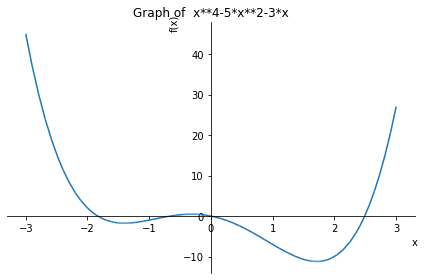

In [164]:
from sympy import Symbol, sympify, pprint, init_printing, Derivative, diff
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_single_variable_without_lambda(f : str, x : str, start : float, learn_rate : float = 0.2, n_iter : int = 50, tolerance : float = 1e-06):
  '''
    Gradient descent for single-variable expressions. Very flexible implementation, client needs to provide the cost function as a string expression.
    Inputs:
      f : expression
      x : symbol in expression
      start : starting value of x
      learn_rate : learning rate
      n_iter : number of iterations
      tolerance : tolerance
    Example:
      func = 'x**4-5*x**2-3*x'
      gradient_descent_multivar_without_lamda(func, 'x', start=0, learn_rate=0.1, n_iter=10)   
  '''
  
  f = sympify(f)
  #pprint(f)

  # Differentiate f w.r.t x
  x = Symbol(x)
  gradient = diff(f, x)
  #pprint(gradient)

  vector = start
  for i in range(n_iter):
    delta = -learn_rate * gradient.subs(x, vector)
    if np.all(np.abs(delta) <= tolerance):
      break
    vector += delta

  return vector 

func = 'x**4-5*x**2-3*x'
x = Symbol('x')


gd = gradient_descent_single_variable_without_lambda(func, x.name, start=0, learn_rate=0.1, n_iter=10)
print(gd)

#print(gradient_descent("x**2", "x", learn_rate=0.8, start=10))

plot(func, (x, -3, 3), title="%s %s"%("Graph of ", func), xlabel=x.name, ylabel='f('+x.name+')')

In [170]:
from sympy import Symbol, sympify, pprint, init_printing, Derivative, diff
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_multivar_without_lamda(f : str, symbols, start, learn_rate : float = 0.2, n_iter : int = 50, tolerance : float = 1e-06):
  '''
    Gradient descent for multi-variable expressions. Very flexible implementation, client needs to provide the cost function as a string expression.
    Inputs:
      f : expression
      symbols : symbols in expression
      start : starting value for each symbol
      learn_rate : learning rate
      n_iter : number of iterations
      tolerance : tolerance
    Example:
      func = 'x**2+y**4'
      radient_descent_multivar_without_lamda(func, symbols=np.array(['x', 'y']), start=np.array([1.0, 1.0]), learn_rate=0.2, tolerance=1e-08)   
  '''
  f = sympify(f)
  #pprint(f)

  # Create all symbols
  symbols = [Symbol(s) for s in symbols]
  #pprint(symbols)

  # Compute all gradients
  gradients = [diff(f, s) for s in symbols]
  #pprint(gradients)

  vector = start
  
  for i in range(n_iter):
    deltas = np.array([])
    for j in range(0, len(gradients)):
      delta = -learn_rate * gradients[j].subs(symbols[j], vector[j])
      deltas = np.append(deltas, delta)
      #print('{0}: {1}'.format(symbols[j], str(delta)))
    if np.all(np.abs(deltas) <= tolerance):
      break
    vector = np.add(vector, deltas)

  return vector

# Do a multivariable gradient descent
func = 'x**2+y**4'
g4 = gradient_descent_multivar_without_lamda(func, symbols=np.array(['x', 'y']), start=np.array([1.0, 1.0]), learn_rate=0.2, tolerance=1e-08)
print('Multi variable without lambda: {0}: {1}'.format(func, g4))



Multi variable without lambda: x**2+y**4: [8.08281277464763e-12 0.0975207119893121]


In [171]:
# Compute gradient descent for using single-varible implementation
func = 'x**4-5*x**2-3*x'
g1 = gradient_descent_single_variable_without_lambda(func, 'x', start = 0, learn_rate = 0.1)
print('Single variable without lambda: {0}: {1}'.format(func, g1))

g2 = gradient_descent_single_variable_with_lambda(lambda v : 4 * v**3 - 10 * v - 3, start = 0, learn_rate = 0.1)
print('Single variable using lambda: {0}: {1}'.format(func, g2))

# Compute gradient descent for using multi-varible implementation
g3 = gradient_descent_multivar_without_lamda(func, symbols=np.array(['x']), start=np.array([0.0]), learn_rate=0.1)
print('Multi variable without lambda: {0}: {1}'.format(func, g3))

# Test
if (g1 == g2 and g1 == g3[0]):
  print('Works!')
else:
  print('Oops')

Single variable without lambda: x**4-5*x**2-3*x: 1.28540133031547
Single variable using lambda: x**4-5*x**2-3*x: 1.285401330315467
Multi variable without lambda: x**4-5*x**2-3*x: [1.28540133031547]
Works!
